# Absenteeism at Work - Clustering
CSE4063 - Data Mining Project-2 part-2

**Absenteeism at work Data Set**  
https://archive.ics.uci.edu/ml/datasets/Absenteeism+at+work

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import ShuffleSplit, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.inspection import permutation_importance
from sklearn.cluster import AgglomerativeClustering 
from sklearn.metrics import silhouette_samples, silhouette_score, homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score, adjusted_mutual_info_score, fowlkes_mallows_score
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from sklearn.cluster import DBSCAN 
import matplotlib.cm as cm

# ANALYSING DATA

In [2]:
# read data
data = pd.read_csv("../input/absenteeism-at-work-uci-ml-repositiory/Absenteeism_at_work.csv",
                        sep=';', index_col="ID")
data.head()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
ID,,,,,,,,,,,,,,,,,,,,
11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2


In [3]:
# data types
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 740 entries, 11 to 35
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Reason for absence               740 non-null    int64  
 1   Month of absence                 740 non-null    int64  
 2   Day of the week                  740 non-null    int64  
 3   Seasons                          740 non-null    int64  
 4   Transportation expense           740 non-null    int64  
 5   Distance from Residence to Work  740 non-null    int64  
 6   Service time                     740 non-null    int64  
 7   Age                              740 non-null    int64  
 8   Work load Average/day            740 non-null    float64
 9   Hit target                       740 non-null    int64  
 10  Disciplinary failure             740 non-null    int64  
 11  Education                        740 non-null    int64  
 12  Son                   

In [4]:
# min and max values
data.describe()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,94.587838,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,3.779313,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,81.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,93.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,95.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,97.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,100.000000,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [5]:
# divide columns to numerical and categorical ones
categorical_atts = ['Reason for absence','Month of absence','Day of the week',
                     'Seasons','Disciplinary failure', 'Education', 'Social drinker',
                     'Social smoker', 'Pet', 'Son']
numerical_atts = data.drop(columns=categorical_atts).columns.to_list()

# update types of categorical columns 
#for cat in categorical_atts:
#    data[cat] = data[cat].astype('category')

In [6]:
# number of unique values in categorical atts
data[categorical_atts].nunique()

Reason for absence      28
Month of absence        13
Day of the week          5
Seasons                  4
Disciplinary failure     2
Education                4
Social drinker           2
Social smoker            2
Pet                      6
Son                      5
dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3695: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


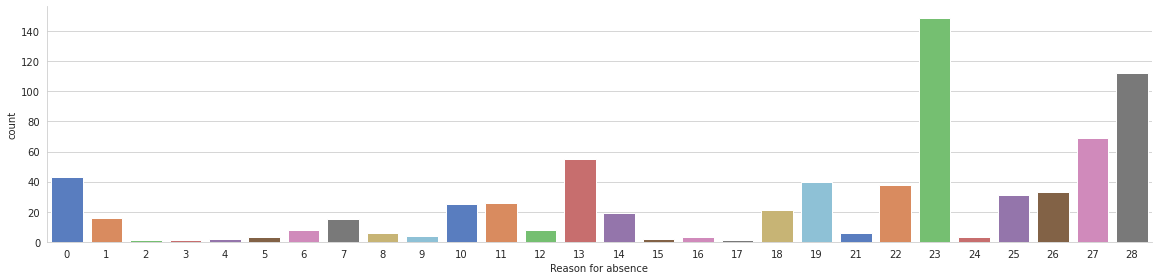

In [7]:
# plot distribution of "reason for absence" column
sns.set_style("whitegrid")
sns.catplot(data=data, x='Reason for absence', kind= 'count',size=4, aspect=4, palette='muted')

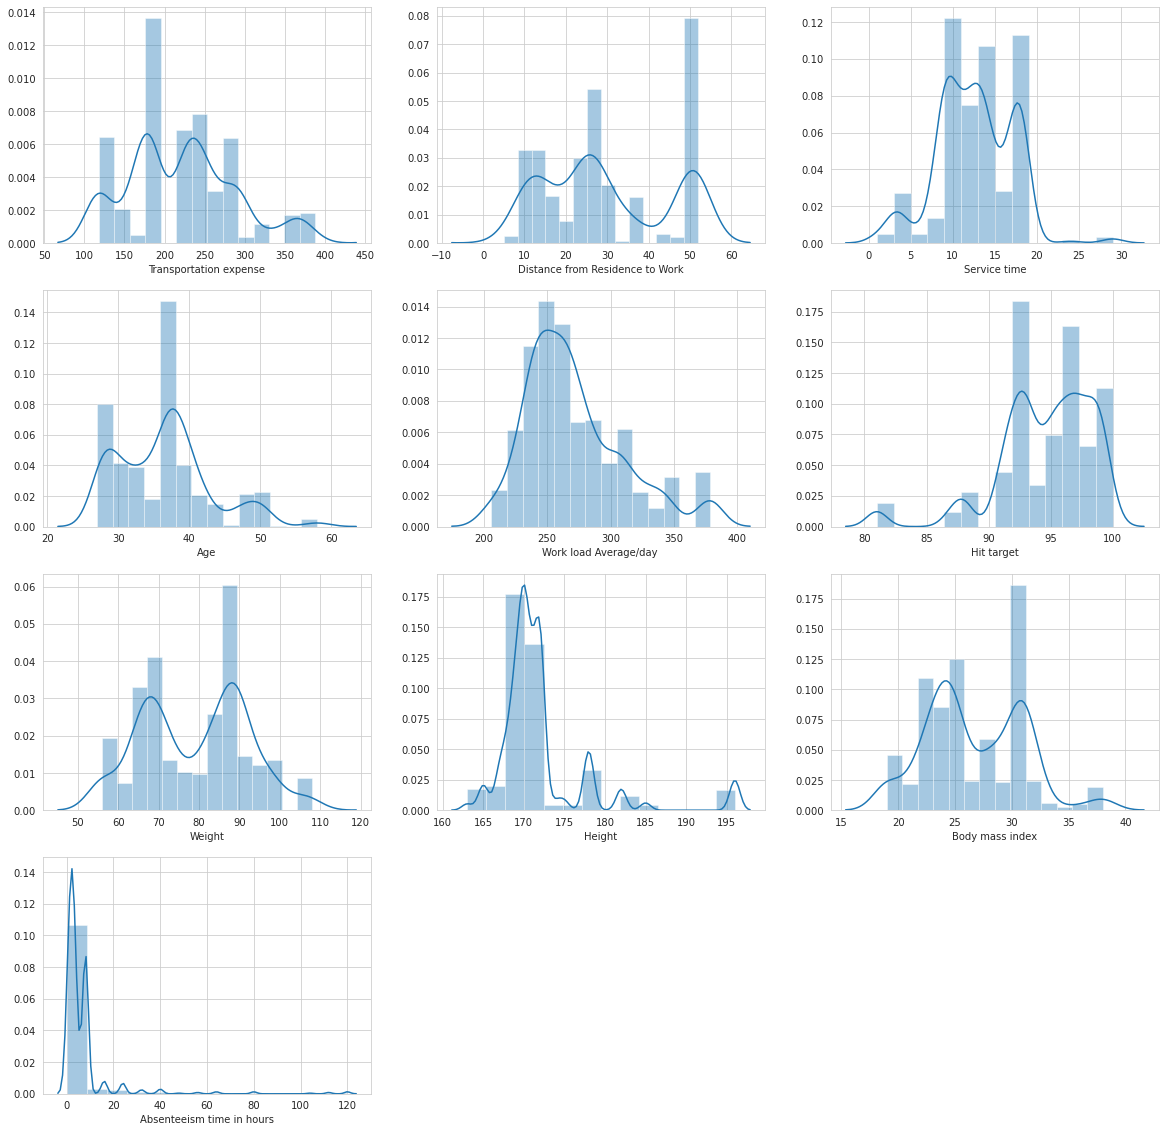

In [8]:
# plot distribution of numerical attributes
num_df = data[numerical_atts]
plt.figure(figsize=(20,20))
for i in range(1, 11):
    plt.subplot(4, 3, i)
    sns.distplot(num_df[num_df.columns[i-1]],bins=14)

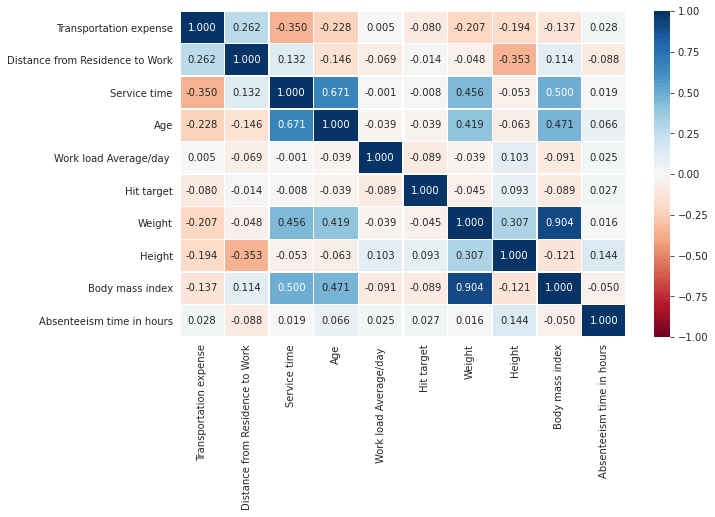

In [9]:
# correlation matrix
num_corr = num_df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(num_corr, annot=True, fmt=".3f",vmin=-1, vmax=1, linewidths=.5, cmap = sns.color_palette("RdBu", 100))
plt.yticks(rotation=0)
plt.show()

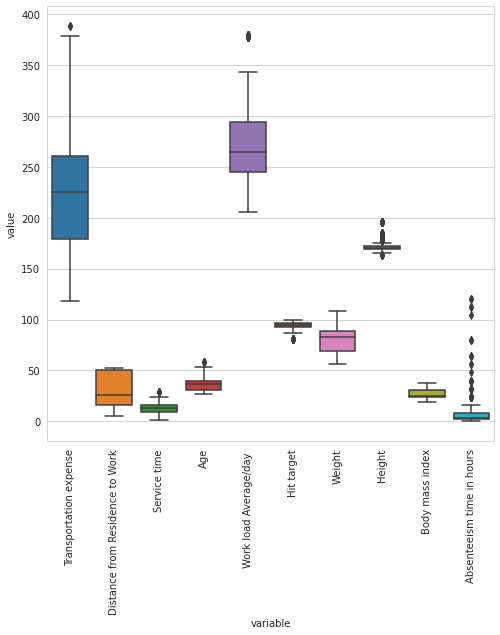

In [10]:
# display boxlots
plt.figure(figsize=(8,8))
sns.boxplot(x="variable", y="value", data=pd.melt(num_df))
plt.xticks(rotation=90)
plt.show()

# OUTLIER DETECTION

In [11]:
# Check for outliers using boxplots and drop them
for num_att in numerical_atts:
    # Getting 75 and 25 percentile of variable "i"
    Q3, Q1 = np.percentile(data[num_att], [75,25])
    MEAN = data[num_att].mean()
    
    # Calculating Interquartile range
    IQR = Q3 - Q1
    
    # Calculating upper extream and lower extream
    minimum = Q1 - (IQR*1.5)
    maximum = Q3 + (IQR*1.5)
    
    # Replacing all the outliers value to Mean
    data_clean=data.drop(data.loc[data[num_att]< minimum,num_att].index) 
    data_clean=data.drop(data.loc[data[num_att]> maximum,num_att].index) 

In [12]:
# size reduced to 150 from 740
len(data_clean)

150

# NORMALIZATION

In [13]:
# transform data
numeric_transformer = MinMaxScaler()
#categorical_transformer = OneHotEncoder(sparse=False, handle_unknown='ignore')

# exclude target attr,bute
numerical_atts = [x for x in numerical_atts if x not in ['Absenteeism time in hours']]
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_atts),
        ('cat', 'passthrough', categorical_atts)
    ], remainder='passthrough')
data_pp = preprocessor.fit_transform(data_clean)

# FEATURE SELECTION

**1. w Random Forest importances:**

Train a RF model to see feature importances. It's ok, we are already have target attribute in the dataset.

In [14]:
# X, y splitting (we dont need train test splitting since this model is just for feature importances)
y_original = data_pp[:,-1].reshape(-1, 1)
y = np.round(MinMaxScaler((0,2)).fit_transform(y_original)).ravel()
X = np.delete(data_pp,-1,1) 

# cross-validation with 10 splits
cross_val = ShuffleSplit(n_splits=10, random_state = 42)

# define model
rf = RandomForestClassifier(random_state = 0,max_features=None,n_jobs=-1)

# parameters 
parameters = {  
                "n_estimators":[1000],
                #'max_depth': list(range(1,11)),
                #"criterion": ["gini","entropy"],
                #"criterion": ["mse","mae"],
                #"class_weight": [None, "balanced"],
                #"max_features":["auto", None, "log2"],
                }

# grid search for parameters
grid = GridSearchCV(estimator=rf, param_grid=parameters, cv=cross_val, n_jobs=-1)#multithreading; all cores are used
grid.fit(X,y)

# print best scores
print("The best parameters are %s with a score of %0.4f"
      % (grid.best_params_, grid.best_score_))

The best parameters are {'n_estimators': 1000} with a score of 0.7133


([<matplotlib.patches.Wedge at 0x7f9aab19ee10>,
 [Text(-0.1313317475276619, 1.0921318473935877, 'Transportation expense'),
  Text(-0.3581127587593462, 1.0400746377129721, 'Distance from Residence to Work'),
  Text(-0.5948118466784025, 0.9253101464109366, 'Service time'),
  Text(-0.8413521534152558, 0.7086088864412525, 'Age'),
  Text(-1.0786359628887607, 0.21574165004244406, 'Work load Average/day '),
  Text(-1.027764258844849, -0.3920467169115161, 'Hit target'),
  Text(-0.8823204639788816, -0.6568946634309728, 'Weight'),
  Text(-0.7636117546052942, -0.7917683298974669, 'Height'),
  Text(-0.5050658629874362, -0.977194184410016, 'Body mass index'),
  Text(0.7140355146727428, -0.83675162610301, 'Reason for absence'),
  Text(1.049786167740627, 0.3285559343862898, 'Month of absence'),
  Text(0.8285714358130334, 0.7235118352554631, 'Day of the week'),
  Text(0.5455920522182793, 0.9551593126574469, 'Seasons'),
  Text(0.43057792989017457, 1.0122265785344169, 'Disciplinary failure'),
  Text(0.3

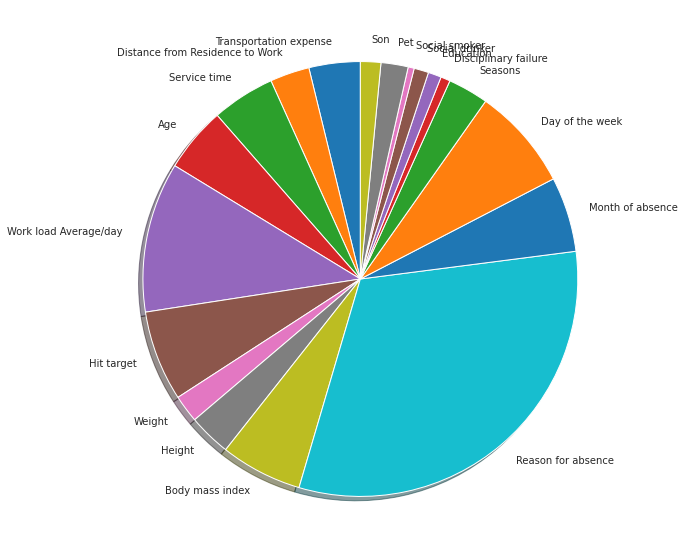

In [15]:
# pie-chart 
atts = numerical_atts+categorical_atts
plt.figure(figsize=(10,10))
plt.pie(grid.best_estimator_.feature_importances_, labels=atts, shadow=True, startangle=90) 

Half of the attributes seem close so it's hard to decide how to do elimination. Thus we tried another method called Permutaion importance.

**2. w Permutation importance:**

see https://scikit-learn.org/stable/modules/permutation_importance.html#permutation-importance

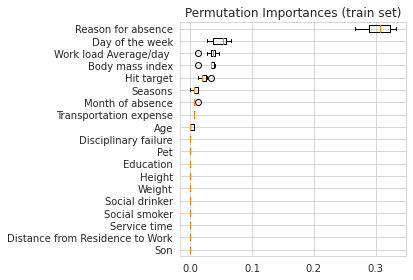

Reason for absence 0.305 +/- 0.021
Day of the week 0.049 +/- 0.013
Work load Average/day  0.035 +/- 0.009
Body mass index 0.033 +/- 0.007
Hit target 0.021 +/- 0.006
Seasons  0.009 +/- 0.004
Month of absence 0.007 +/- 0.002
Transportation expense 0.007 +/- 0.000
Age      0.003 +/- 0.003
Disciplinary failure 0.000 +/- 0.000
Pet      0.000 +/- 0.000
Education 0.000 +/- 0.000
Height   0.000 +/- 0.000
Weight   0.000 +/- 0.000
Social drinker 0.000 +/- 0.000
Social smoker 0.000 +/- 0.000
Service time 0.000 +/- 0.000
Distance from Residence to Work 0.000 +/- 0.000
Son      0.000 +/- 0.000


In [16]:
# permutation importance with RF classifier
atts_arr = np.array(atts)
result = permutation_importance(grid, X, y, n_repeats=10,
                                random_state=42, n_jobs=-1)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=atts_arr[sorted_idx])
ax.set_title("Permutation Importances (train set)")
fig.tight_layout()
plt.show()

for i in result.importances_mean.argsort()[::-1]:
     print(f"{atts_arr[i]:<8} "
           f"{result.importances_mean[i]:.3f}"
           f" +/- {result.importances_std[i]:.3f}")

We choosed 9 attributes based on Permutaion importances w RF

In [17]:
# select important attributes
selected_atts = ['Reason for absence', 'Day of the week', 'Work load Average/day','Body mass index','Hit target', 
                     'Seasons', 'Month of absence', 'Transportation expense', 'Age']

selected_atts_idx=np.where(np.isin(atts,selected_atts))[0]
X_selected = X[:,selected_atts_idx]

# CLUSTERING

**1. K-means:**

"inertia_" attribute provides sum of squared distances of samples to their closest cluster center. Wen can plot it and decide on the parameter "n_clusters" by using elbow method.

see https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

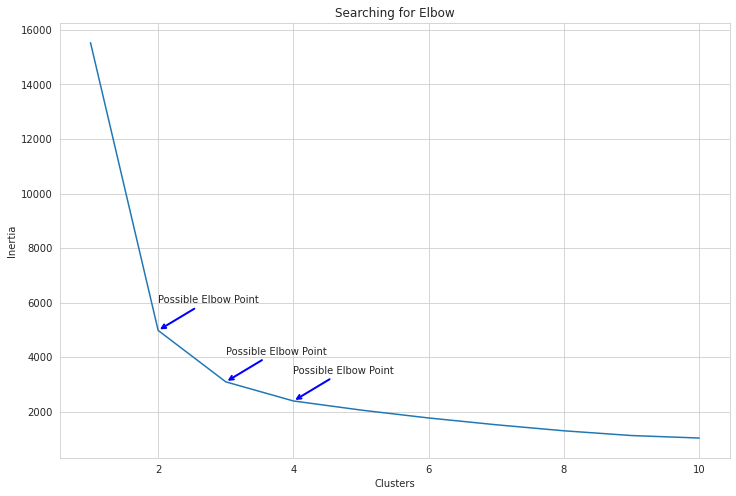

In [18]:
# run k-means for range of 10 clusters then analyse with elbow method
clusters = []

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(X_selected)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

# Annotate arrow
ax.annotate('Possible Elbow Point', xy=(4, clusters[3]), xytext=(4, clusters[3]+1000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

ax.annotate('Possible Elbow Point', xy=(3,clusters[2] ), xytext=(3, clusters[2]+1000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

ax.annotate('Possible Elbow Point', xy=(2,clusters[1] ), xytext=(2, clusters[1]+1000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

plt.show()

Let's try possible elbow points by creating plots. We can use t-SNE for visualizing 9D data on 3D space.

see https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

In [19]:
# 2 clusters
km2 = KMeans(n_clusters=2).fit(X_selected)

# plot using tsne 
X_embedded  = TSNE(n_components=3, perplexity=10, random_state=24).fit_transform( X_selected )
colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])

fig = px.scatter_3d(x=X_embedded [:,0],y=X_embedded [:,1],z=X_embedded [:,2],color=colors[km2.labels_])
fig.show()

In [20]:
# 3 clusters
km3 = KMeans(n_clusters=3).fit(X_selected)

# plot using tsne 
X_embedded  = TSNE(n_components=3, perplexity=10,random_state=24).fit_transform( X_selected )

fig = px.scatter_3d(x=X_embedded [:,0],y=X_embedded [:,1],z=X_embedded [:,2],color=colors[km3.labels_])
fig.show()

In [21]:
# 4 clusters
km4 = KMeans(n_clusters=4).fit(X_selected)

# plot using tsne 
X_embedded  = TSNE(n_components=3, perplexity=10,random_state=24).fit_transform( X_selected )

fig = px.scatter_3d(x=X_embedded [:,0],y=X_embedded [:,1],z=X_embedded [:,2],color=colors[km4.labels_])
fig.show()

It seems like 4 clusters work best. Let's try the same process again with PCA + K-means.

For PCA see https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [22]:
# PCA for reducing dimensions to 3
pca = PCA(n_components=3)
pca_results = pca.fit_transform(X_selected)

# running k-means on resuts of pca
km_pca = KMeans(n_clusters=3).fit(pca_results)
fig = px.scatter_3d(x=pca_results [:,0],y=pca_results [:,1],z=pca_results [:,2],color=colors[km_pca.labels_])
fig.show()

We lost most of valuable information about data with PCA so, resulting graph seems incomplete. Using k-means on original 7-dimensional data then plotting with t-sne gives better results.

**2. AGNES:**

There's no inertia (Sum of squared distances of samples to their closest cluster center) attribute of AgglomerativeClustering class so we used silhouette coefficient (best:1, worst:-1) to select cluster number of AGNES.

see https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score 

for AGNES see https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering

In [23]:
# define a function to plot silhouette values of clusters
def silhouette_plot(X, y, n_clusters, ax=None):
    if ax is None:
        ax = plt.gca()

    # Compute the silhouette scores for each sample
    silhouette_avg = silhouette_score(X, y)
    sample_silhouette_values = silhouette_samples(X, y)

    y_lower = padding = 2
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        ith_cluster_silhouette_values = sample_silhouette_values[y == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                         0,
                         ith_cluster_silhouette_values,
                         facecolor=color,
                         edgecolor=color,
                         alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i + 1))

        # Compute the new y_lower for next plot
        y_lower = y_upper + padding

    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")

    # The vertical line for average silhoutte score of all the values
    ax.axvline(x=silhouette_avg, c='r', alpha=0.8, lw=0.8, ls='-')
    ax.annotate('Average',
                xytext=(silhouette_avg, y_lower * 1.025),
                xy=(0, 0),
                ha='center',
                alpha=0.8,
                c='r')

    ax.set_yticks([])  # Clear the yaxis labels / ticks
    ax.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
    ax.set_ylim(0, y_upper + 1)
    ax.set_xlim(-0.075, 1.0)
    return ax

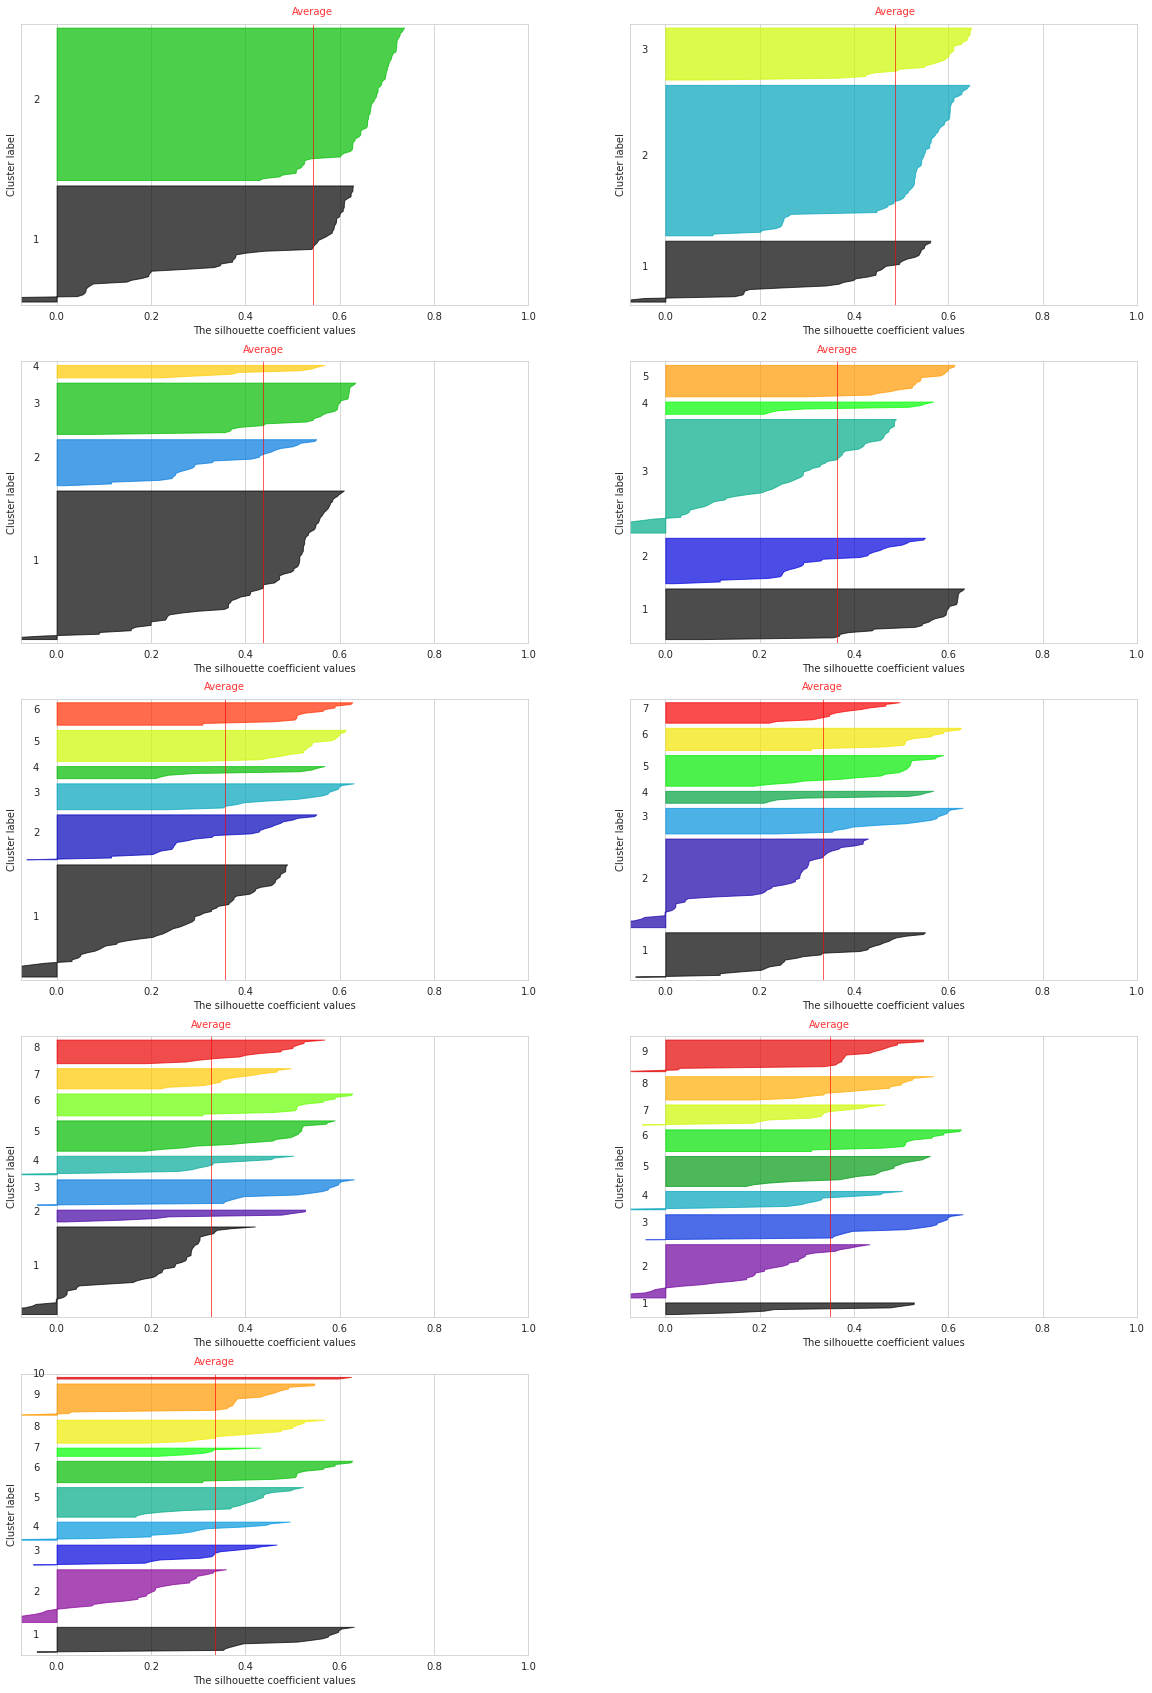

In [24]:
# plot silhouette coefficients
plt.figure(figsize=(20,30))
for i in range(2,11):  
    agnes = AgglomerativeClustering(n_clusters=i, linkage='average')
    agnes_labels = agnes.fit_predict(X_selected)
    plt.subplot(5,2,i-1)
    silhouette_plot(X_selected,agnes_labels,i)


It seems like 3, 6 or 9 are best amongst them (cluster with euqal sizes and significant silhouette value). We choosed to work with n_clusters = 3.

In [25]:
# 6 clusters
agnes6 = AgglomerativeClustering(n_clusters=6, linkage='average').fit(X_selected)

# plot using tsne 
X_embedded  = TSNE(n_components=3, perplexity=10,random_state=24).fit_transform( X_selected )

fig = px.scatter_3d(x=X_embedded [:,0],y=X_embedded [:,1],z=X_embedded [:,2],color=colors[agnes6.labels_])
fig.show()

Let's plot the complete dendrogram to see the possible clusterings.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



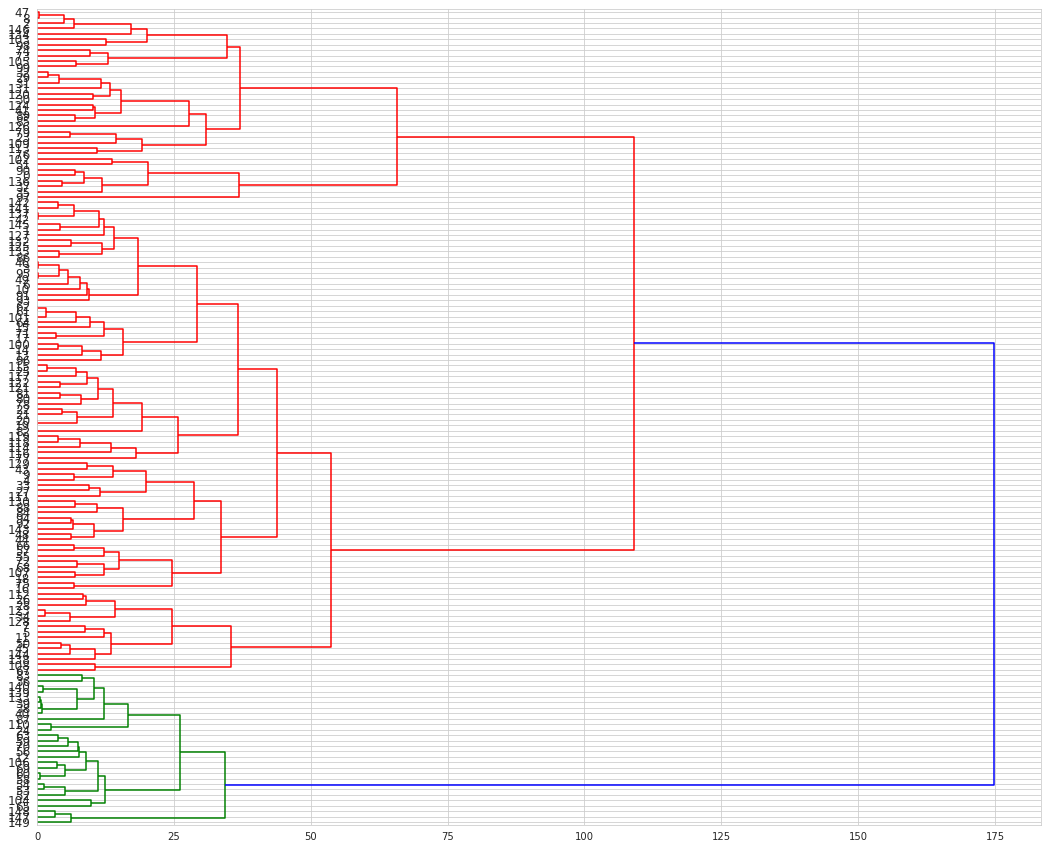

In [26]:
# there's no inertia in attribute of AgglomerativeClustering class so we use scipy's distance matrix
dist = distance_matrix(X_selected, X_selected)

# dendrogram
Z = hierarchy.linkage(dist, 'average')
plt.figure(figsize=(18, 15))
dendro = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size=12, orientation='right')

**3. DBSCAN:**

eps: The maximum distance between two samples for one to be considered as in the neighborhood of the other (default: 0.5).

min_samples: The number of samples (or total weight) in a neighborhood for a point to be considered as a core point. This includes the point itself (default: 5).

see https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

In [27]:
# search for best parameters by using silhouette_score
score_list=[]
for eps in np.arange(0.5,20,0.5):
    for min_samples in range(3,20):
        db = DBSCAN(eps=eps, min_samples=min_samples).fit(X_selected)
        labels = db.labels_
        n = len(np.unique(labels))
        if n>1:
            score=silhouette_score(X_selected, labels)
            score_list.append((score,(eps,min_samples)))
     
biggest_score = sorted(score_list)[-1]  
best_eps, best_min_spamles = biggest_score[1]
best_eps, best_min_spamles

(5.0, 11)

In [28]:
# best model for DBSCAN
db_best = DBSCAN(eps=best_eps, min_samples=best_min_spamles).fit(X_selected)

# plot using tsne 
X_embedded  = TSNE(n_components=3, perplexity=10,random_state=24).fit_transform( X_selected )

fig = px.scatter_3d(x=X_embedded [:,0],y=X_embedded [:,1],z=X_embedded [:,2],color=colors[db_best.labels_])
fig.show()

# EVALUATION
We will compare best of 3 models by using 8 metrics:
* Estimated number of clusters
* Estimated number of noise points
* Homogeneity: For perfect clustering, each cluster contains only members of a single class.
* Completeness: For perfect clustering, all members of a given class are assigned to the same cluster.
* V-measure: Harmonic mean of Homogeneity and Completeness.
* Adjusted Rand Index: Given the knowledge of the ground truth class, the adjusted Rand index is a function that measures the similarity of the two assignments, ignoring permutations and with chance normalization:
* Adjusted Mutual Information: Given the knowledge of the ground truth class, the Mutual Information is a function that measures the agreement of the two assignments, ignoring permutations.
* Fowlkes-Mallows score: Geometric mean of precision and recall.
* Silhouette Coefficient: If the ground truth labels are not known, the Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample by (b - a) / max(a, b)

see https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation

In [29]:
# print metric for chosen models
models = [km4, km_pca, agnes6, db_best] 
names = ["K-MEANS:","PCA + K-MEANS:","AGNES:", "DBSCAN:"]

for i, model in enumerate(models):
    labels = model.labels_
    n = len(np.unique(labels))
    y = np.round(MinMaxScaler((0,n)).fit_transform(y_original)).ravel()
    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)
    print(names[i])
    print('Estimated number of clusters: %d' % n_clusters_)
    print('Estimated number of noise points: %d' % n_noise_)
    print("Homogeneity: %0.3f" % homogeneity_score(y, labels))
    print("Completeness: %0.3f" % completeness_score(y, labels))
    print("V-measure: %0.3f" % v_measure_score(y, labels))
    print("Adjusted Rand Index: %0.3f"
          % adjusted_rand_score(y, labels))
    print("Adjusted Mutual Information: %0.3f"
          % adjusted_mutual_info_score(y, labels))
    print("Fowlkes-Mallows score: %0.3f"
          % fowlkes_mallows_score(y, labels))
    print("Silhouette Coefficient: %0.3f"
          % silhouette_score(X, labels))
    print("\n")

K-MEANS:
Estimated number of clusters: 4
Estimated number of noise points: 0
Homogeneity: 0.157
Completeness: 0.133
V-measure: 0.144
Adjusted Rand Index: 0.075
Adjusted Mutual Information: 0.121
Fowlkes-Mallows score: 0.344
Silhouette Coefficient: 0.330


PCA + K-MEANS:
Estimated number of clusters: 3
Estimated number of noise points: 0
Homogeneity: 0.147
Completeness: 0.176
V-measure: 0.160
Adjusted Rand Index: 0.077
Adjusted Mutual Information: 0.143
Fowlkes-Mallows score: 0.423
Silhouette Coefficient: 0.437


AGNES:
Estimated number of clusters: 6
Estimated number of noise points: 0
Homogeneity: 0.211
Completeness: 0.188
V-measure: 0.199
Adjusted Rand Index: 0.110
Adjusted Mutual Information: 0.156
Fowlkes-Mallows score: 0.348
Silhouette Coefficient: 0.276


DBSCAN:
Estimated number of clusters: 2
Estimated number of noise points: 0
Homogeneity: 0.029
Completeness: 0.045
V-measure: 0.035
Adjusted Rand Index: -0.035
Adjusted Mutual Information: 0.024
Fowlkes-Mallows score: 0.557
Silh

Only metric doesn't reqire ground-truth labels is Silhouette Coefficient. For it, DBSCAN takes ahead, then comes PCA+KMEANS and followed by K-MEANS and AGNES. Its results are correlated with Fowlkes-Mallows score altough they require different inputs with only difference of swapping AGNES and K-MEANS.

But from the perspective of Homogeneity and Completeness principles, AGNES performs best. Followings are PCA+KMEANS, K-MEANS and DBSCAN. The results are similar for Mutual Information.

And finally for Rand Index AGNES performs best again. Followings are K-MEANS, PCA+KMEANS and DBSCAN. 